In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
animal = tf.constant('Cat',tf.string)
number = tf.constant(1.33422,tf.float64)
number

<tf.Tensor: shape=(), dtype=float64, numpy=1.33422>

In [5]:
# so dimention
tf.rank(animal).numpy()


0

In [7]:
matrix = tf.constant([[1,2,3],[4,5,6]],tf.int64)
print(tf.rank(matrix).numpy())
print(tf.shape(matrix).numpy())

2
[2 3]


In [8]:
#  define 4-d tensor 
images = tf.zeros([10,128,128,3])
print(tf.rank(images).numpy())

4


In [10]:
tf.shape(images).numpy().tolist()

[10, 128, 128, 3]

In [12]:
a = tf.constant(10)
b = tf.constant(15)
c = a+b
c

<tf.Tensor: shape=(), dtype=int32, numpy=25>

In [15]:
t = tf.constant(2)
t = tf.square(t)
t.numpy()

4

In [20]:
#  variable : la bien dung de that doi cac phan tu 
v = tf.Variable([[1.,2,3],[4,5,6]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [21]:
v.assign(v**2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [22]:
v[0,1].assign(7)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  7.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [25]:
# auto gradient
x = tf.Variable(4.0)
with tf.GradientTape() as tape2:
    with tf.GradientTape() as tape1:
        y = x**2
    dy_dx1 = tape1.gradient(y,x)
dy_dx2 = tape2.gradient(dy_dx1,x)
print(dy_dx1)
print(dy_dx2)    

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [26]:
# dao ham tung phan
with tf.GradientTape(persistent=True) as tape:
    y = x*x
    z = y*y
dz_dx = tape.gradient(z,x)
dy_dx = tape.gradient(y,x)
print(dz_dx)
print(dy_dx)


tf.Tensor(256.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)


In [54]:
# minimum L = (x - xf)^2 use gradientTape
x_f = tf.Variable(2.)
x = tf.Variable(tf.random.normal([1]))
x

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.8969772], dtype=float32)>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


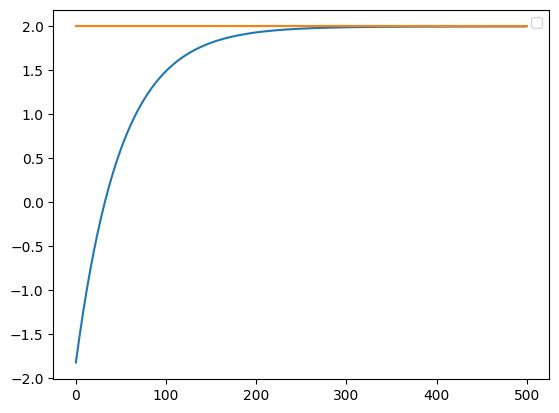

In [56]:
import matplotlib.pyplot as plt
history = []
learning_rate =0.01
for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f)**2
    grad = tape.gradient(loss,x)
    x_upd = x - learning_rate*grad
    x.assign(x_upd)
    history.append(x.numpy()[0])
plt.plot(history)
plt.plot([0,500],[x_f,x_f])
plt.legend()

